# Project 1: SAT & ACT Analysis

In this project, we perform an analysis on the data for SAT and ACT for year 2017 and 2018. After completing the analysis, we will make reccomendations on how to improve the participation rate for SAT and which State should we place our emphasise on

## Problem Statement

How does the participation rate for SAT fare against the ACT. How can we improve SAT's participation rate and which states should we first focus on.

## Executive Summary

SAT was created to standardize college admissions procedures and increase access to higher education. In 1959, ACT was introduced and SAT faced competition. SAT went through a few major revisions throughout the years, with the lates in 2016, reversing some of the changes made earlier in the years in response to competition from ACT.

In this analysis, we are comparing how SAT fare against ACT in participation rates, look at causes that influence major increase in participation, and ultimately recommend actions to take and states to focus on to increase the participation for SAT. Data was obtained internally and also through public available records.

From the data, it is observed that when ACT's participation rate increases, SAT's decrease. And when SAT's participation rate increase, the total score also decreases. A year on year comparison was made and states with more than 20% increase in particiation rates are Colorado, Illinois and Rhode Island for SAT and Ohio for ACT.

The reason for the increase for Colorado and Illinois is due to a change in state regulation switching from ACT to the SAT. 

Rhode Island do not mandate the SAT or ACT and there are 6 schools in Rhode Island which have made submitting SAT or ACT optional. Rhode Island is also one of the 10 states that give SAT to students for free.

It is recommended that we focus we do not try to influence too many states at the same time, or increase the participation rate drastically as it will affect our national average total score. 

Ohio is already paying for students taking the SAT or ACT. We can work with the state Department of Education to make SAT mandatory, Ohio has a healthy 2018 participation rate and increasing their their participation rate will have manageable impact on the total scores.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Import
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
df_sat2017 = pd.read_csv('../data/sat_2017.csv')
df_act2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
df_sat2017.head(10) # Display first 5 rows of the data frame

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
df_sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [5]:
df_act2017.head(10)

# There is an additional row compared to SAT 2017, National

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [6]:
df_act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 

The data shows the breakdown of average scores and participation rate for ACT and SAT for year 2017 for all 50 states in the United States (https://en.wikipedia.org/wiki/U.S._state). It is noticed that ACT has an additional row showing data for National average and participation which is not present in SAT's data. 

From the above preliminary data exploration, it is deduced that we have the data for every states, there are also no missing values.

Below is observation for each feature:

SAT 2017
- Name of State shows the name of the state data type is string
- Participation shows the state's participation rate for SAT, the data type should be an integer
- Evidence-Base and Writing shows the state's average scores for the subject data type is integer
- Maths shows the state's average score for the subject data type is integer
- Total showing the state's total average score, data type is integer. 

ACT 2017
- Name of State shows the name of the state, data type is string
- Participation shows the state's participation rate for ACT, data type should be an integer
- English shows the state's average score for the subject data type is float
- Maths shows the state's average score for the subject data type is float
- Reading shows the state's average score for the subject data type is float
- Science shows the state's average score for the subject data type is float
- Composite shows the state's average composite score, data type should be float




#### 4a. Does the data look complete? 

Answer:

The data is complete, there are 50 states and we have 50 rows of data with no missing values. Although we do not have the National data for SAT, this will not hinder our analysis as it is not relevant towards our goal. Further more, National data can be calculated from the data of every state. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [7]:
df_sat2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [8]:
df_act2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


Answer:

SAT
- Participation can be 0 to 100
- Total can be from 0 to 1600
- Evidence-Based Reading and Writing can be from 0 to 800
- Maths can be from 0 to 800
- Total should be the Evidence-Based Reading and Writing + Maths

https://blog.prepscholar.com/whats-the-highest-possible-sat-score#targetText=The%20highest%20possible%20score%20you,a%20composite%20score%20of%201600.

ACT
- Participation can be from 0 to 100
- Composite can be from 0 to 36
- English can be from 0 to 36
- Maths can be from 0 to 36
- Reading can be from 0 to 36
- Science can be from 0 to 36
- Composite should be (English + Maths + Reading + Science) / 4
    
https://blog.prepscholar.com/whats-the-highest-possible-act-score

There are no obvious questionable values observed currently. We can make a further check on the total and composite scores to determine if they do add up

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
# Function to calculate if Total column correct (Math + Evidence-Based Reading and Writing), and display incorrect states

def check_sat_total(dataframe, state_column, maths_column, evidence_column, total_column):
    for state, maths, evidence, total in zip(dataframe[state_column], dataframe[maths_column], dataframe[evidence_column], dataframe[total_column]):
        if maths + evidence != total:
            print("{}'s total is {}, should be {}".format(state, total, (maths+evidence)))
    print('Done')

In [10]:
check_sat_total(df_sat2017, 'State', 'Math', 'Evidence-Based Reading and Writing', 'Total')

Connecticut's total is 1041, should be 1042
Delaware's total is 996, should be 995
Idaho's total is 1005, should be 1006
Iowa's total is 1275, should be 1276
Louisiana's total is 1198, should be 1197
Maryland's total is 1060, should be 588
Massachusetts's total is 1107, should be 1106
Michigan's total is 1005, should be 1004
Mississippi's total is 1242, should be 1241
Nebraska's total is 1253, should be 1254
New York's total is 1052, should be 1051
Ohio's total is 1149, should be 1148
Rhode Island's total is 1062, should be 1063
South Dakota's total is 1216, should be 1215
Tennessee's total is 1228, should be 1227
Vermont's total is 1114, should be 1113
Done


Maryland's total has a large discrepency and is worth taking a closer look

In [11]:
df_sat2017[df_sat2017.values == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [12]:
df_sat2017['Math'].replace(52, (1060 - 536), inplace = True) 

Manually replace Maryland's value with Total - Evidence-Based Reading and writing

In [13]:
# Function update SAT's Total column with the correct value

def update_sat_total(dataframe, state_column, maths_column, evidence_column, total_column):
    for state, maths, evidence, total in zip(dataframe[state_column], dataframe[maths_column], dataframe[evidence_column], dataframe[total_column]):
        if maths + evidence != total:
            dataframe[total_column].replace(total, (maths + evidence), inplace = True)
            print("{}'s old total {}, new total {}".format(state, total, (maths+evidence)))
    print('Done')
    

In [14]:
update_sat_total(df_sat2017, 'State', 'Math', 'Evidence-Based Reading and Writing', 'Total')

Connecticut's old total 1041, new total 1042
Delaware's old total 996, new total 995
Idaho's old total 1005, new total 1006
Iowa's old total 1275, new total 1276
Louisiana's old total 1198, new total 1197
Massachusetts's old total 1107, new total 1106
Michigan's old total 1006, new total 1004
Mississippi's old total 1242, new total 1241
Nebraska's old total 1253, new total 1254
New York's old total 1052, new total 1051
Ohio's old total 1149, new total 1148
Rhode Island's old total 1062, new total 1063
South Dakota's old total 1216, new total 1215
Tennessee's old total 1228, new total 1227
Vermont's old total 1114, new total 1113
Done


Replace SAT's total column with correct values

In [15]:
# Function to check if ACT's composite score is correct ((English + Math + Reading + Science / 4)) and display

def check_act_composite(dataframe, state_column, english_column, math_column, reading_column, science_column, composite_column):
    for state, english, math, reading, science, composite in zip(dataframe[state_column], dataframe[english_column], dataframe[math_column], dataframe[reading_column], dataframe[science_column], dataframe[composite_column]):
        right_composite = round((english + math + reading + science) / 4, 1)
        if right_composite != composite:
            print("{}'s composite is {}, should be composite {}".format(state, composite, right_composite))
    print('Done')

In [16]:
check_act_composite(df_act2017, 'State', 'English', 'Math', 'Reading', 'Science', 'Composite')

# All states are displayed because data type is still object. A better way is to convert the data type before running the check

National's composite is 21.0, should be composite 20.9
Alabama's composite is 19.2, should be composite 19.1
Alaska's composite is 19.8, should be composite 19.7
Arizona's composite is 19.7, should be composite 19.6
Arkansas's composite is 19.4, should be composite 19.3
California's composite is 22.8, should be composite 22.6
Colorado's composite is 20.8, should be composite 20.6
Connecticut's composite is 25.2, should be composite 25.1
Delaware's composite is 24.1, should be composite 24.0
District of Columbia's composite is 24.2, should be composite 24.1
Florida's composite is 19.8, should be composite 19.7
Georgia's composite is 21.4, should be composite 21.3
Hawaii's composite is 19.0, should be composite 18.9
Idaho's composite is 22.3, should be composite 22.2
Illinois's composite is 21.4, should be composite 21.3
Indiana's composite is 22.6, should be composite 22.5
Iowa's composite is 21.9, should be composite 21.8
Kansas's composite is 21.7, should be composite 21.6
Kentucky's 

In [17]:
# Function to update ACT composite column with the correct value. This function also convert the data type to desired

def update_act_composite(dataframe, state_column, english_column, math_column, reading_column, science_column, composite_column):
    for state, english, math, reading, science, composite in zip(dataframe[state_column], dataframe[english_column], dataframe[math_column], dataframe[reading_column], dataframe[science_column], dataframe[composite_column]):
        right_composite = round((english + math + reading + science) / 4, 1)
        if right_composite != composite:
            dataframe[composite_column].replace(composite, right_composite, inplace = True)
            print("{}'s old composite {}, new composite {}".format(state, composite, right_composite))
    print('Done')


In [18]:
update_act_composite(df_act2017, 'State', 'English', 'Math', 'Reading', 'Science', 'Composite')

National's old composite 21.0, new composite 20.9
Alabama's old composite 19.2, new composite 19.1
Alaska's old composite 19.8, new composite 19.7
Arizona's old composite 19.7, new composite 19.6
Arkansas's old composite 19.4, new composite 19.3
California's old composite 22.8, new composite 22.6
Colorado's old composite 20.8, new composite 20.6
Connecticut's old composite 25.2, new composite 25.1
Delaware's old composite 24.1, new composite 24.0
District of Columbia's old composite 24.2, new composite 24.1
Georgia's old composite 21.4, new composite 21.3
Hawaii's old composite 19.0, new composite 18.9
Idaho's old composite 22.3, new composite 22.2
Indiana's old composite 22.6, new composite 22.5
Iowa's old composite 21.9, new composite 21.8
Kansas's old composite 21.7, new composite 21.6
Kentucky's old composite 20.0, new composite 19.9
Louisiana's old composite 19.5, new composite 19.4
Maine's old composite 24.3, new composite 24.2
Maryland's old composite 23.6, new composite 18.2
Ma

Replace ACT's composite score with correct values and data type

#### 5. What are your data types? 
Display the data types of each feature. 

In [19]:
df_sat2017.dtypes 
# Participation is an object instead of integer

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [20]:
df_act2017.dtypes 
# Participation is an object instead of integer, composition had already been changed to correct data type earlier

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

SAT 2017
- Participation should be an number and not an object(string)
   
ACT 2017
- Participation should be a number and not an object(string)
- Composite had been changed to the right data type earlier when checking for composite's veracity

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [21]:
# Function to change data type for Participation column of ACT and SAT
def change_datatype_to_number(dataframe, col_name):
    dataframe[col_name] = dataframe[col_name].str.replace('%', '') # replace % with ''(nothing). must use str.replace
    dataframe[col_name] = dataframe[col_name].apply(pd.to_numeric) # convert the column data types to numeric

- Fix any individual values preventing other columns from being the appropriate type.

In [22]:
# Change data type for SAT and ACT's Participation column

change_datatype_to_number(df_sat2017, 'Participation')
change_datatype_to_number(df_act2017, 'Participation')

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [23]:
df_sat2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [24]:
df_act2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [25]:
# Rename ACT's column using dictionary method
df_act2017.rename(columns={'State' : 'state', # changing state name to be same to sat 2017 as it will be used to merge later
                           'Participation' : 'act2017_participation',
                           'English' : 'act2017_english',
                           'Math' : 'act2017_maths',
                           'Reading' : 'act2017_reading',
                           'Science' : 'act2017_science',
                           'Composite' : 'act2017_composite'
                          }, inplace = True)

In [26]:
df_act2017.head()

,state,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite
0,National,60,20.3,20.7,21.4,21.0,20.9
1,Alabama,100,18.9,18.4,19.7,19.4,19.1
2,Alaska,65,18.7,19.8,20.4,19.9,19.7
3,Arizona,62,18.6,19.8,20.1,19.8,19.6
4,Arkansas,100,18.9,19.0,19.7,19.5,19.2


In [27]:
# Rename SAT's column using dictionary method. 
# State column and changed to be same as ACT's as it will be used when merging later

df_sat2017.rename(columns={'State' : 'state', 
                           'Participation' : 'sat2017_participation',
                           'Evidence-Based Reading and Writing' : 'sat2017_evidence_base',
                           'Math' : 'sat2017_maths',
                           'Total' : 'sat2017_total'
                          }, inplace = True)

In [28]:
df_sat2017.head()

,state,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


### Data Dictionary


|Entity|Attribute(Column Name)|Data Type|Index(Y/N)|Description|
|---|---|---|---|---|
|df_sat2017|state|String|Yes|Index for the dataframe, show state name|
|df_sat2017|sat2017_participation|Integer|No|Shows State Participation Rate for SAT|
|df_sat2017|sat2017_evidence_base|Integer|No|Shows State Average Score for Evidence-Based Reading and Writing|
|df_sat2017|sat2017_maths|Integer|No|Shows State Average Score for Math|
|df_sat2017|sat2017_total|Integer|No|Show State Average Total, value is determined by evidence_base + maths
|df_act2017|state|String|Yes|Index for Data Frame, show state name|
|df_act2017|act2017_participation|Integer|No|Show State Participation Rate for ACT|
|df_act2017|act2017_english|Float|No|Show State Average Score for English
|df_act2017|act2017_maths|Float|No|Show State Average Score for Math
|df_act2017|act2017_reading|Float|No|Show State Average Score for Reading
|df_act2017|act2017_science|Float|No|Show State Average Score for Science
|df_act2017|act2017_composite|Float|No|Show State Average Composite Score, value is determined by (English + Maths + Reading + Science) / 4

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [29]:
# Drop ACT's first row of the data frame. Which is National

df_act2017.drop([0] ,axis = 0, inplace = True) 

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [30]:
# Merge both dataframes

df_merged2017 = df_act2017.merge(df_sat2017, on = 'state')
df_merged2017.set_index('state', inplace = True)

df_merged2017.head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total
state,,,,,,,,,,
Alabama,100,18.9,18.4,19.7,19.4,19.1,5,593,572,1165
Alaska,65,18.7,19.8,20.4,19.9,19.7,38,547,533,1080
Arizona,62,18.6,19.8,20.1,19.8,19.6,30,563,553,1116
Arkansas,100,18.9,19.0,19.7,19.5,19.2,3,614,594,1208
California,31,22.5,22.7,23.1,22.2,22.6,53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [31]:
# Save df_merged2017.csv as combined_2017.csv to data folder 
df_merged2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [32]:
# Read SAT2018 csv file and display first 5 row

df_sat2018 = pd.read_csv('../data/sat_2018.csv')
df_sat2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [33]:
# Display the information of the SAT2018. Notice that participation is suppose to be int but it is object

df_sat2018.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [34]:
# Check SAT2018's total column

check_sat_total(df_sat2018, 'State', 'Math', 'Evidence-Based Reading and Writing', 'Total') 

Arkansas's total is 1169, should be 1168
Connecticut's total is 1053, should be 1054
Delaware's total is 998, should be 997
Kansas's total is 1265, should be 1264
Michigan's total is 1011, should be 1010
New Mexico's total is 1093, should be 1092
North Carolina's total is 1098, should be 1097
Vermont's total is 1120, should be 1119
Wyoming's total is 1257, should be 1258
Done


In [35]:
# Update SAT2018's total column

update_sat_total(df_sat2018, 'State', 'Math', 'Evidence-Based Reading and Writing', 'Total') 

Arkansas's old total 1169, new total 1168
Connecticut's old total 1053, new total 1054
Delaware's old total 998, new total 997
Kansas's old total 1265, new total 1264
Michigan's old total 1011, new total 1010
New Mexico's old total 1093, new total 1092
North Carolina's old total 1098, new total 1097
Vermont's old total 1120, new total 1119
Wyoming's old total 1257, new total 1258
Done


In [36]:
# Change SAT2018's Participation column datatype to integer 

change_datatype_to_number(df_sat2018, 'Participation') 

In [37]:
# Change SAT2018's column name to desired using dictionary method and display the first 5 rows
df_sat2018.rename(columns={'State' : 'state',
                           'Participation' : 'sat2018_participation',
                           'Evidence-Based Reading and Writing' : 'sat2018_evidence_base',
                           'Math' : 'sat2018_maths',
                           'Total' : 'sat2018_total'
                          }, inplace = True)

df_sat2018.head()

,state,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1168
4,California,60,540,536,1076


In [38]:
# Read and display first 5 rows for ACT2018

df_act2018 = pd.read_csv('../data/act_2018.csv')
df_act2018.head()

,State,Participation,Composite,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100%,19.1,18.9,18.3,19.6,19.0
1,Alaska,33%,20.8,19.8,20.6,21.6,20.7
2,Arizona,66%,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100%,19.4,19.1,18.9,19.7,19.4
4,California,27%,22.7,22.5,22.5,23.0,22.1


In [39]:
# Display the information of the ACT2018. Notice that participation is suppose to be int but it is object

df_act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                    51 non-null object
Participation            51 non-null object
Composite                51 non-null float64
Average English Score    51 non-null float64
Average Math Score       51 non-null float64
Average Reading Score    51 non-null float64
Average Science Score    51 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [40]:
# Check composite score for ACT2018, and display inaccuracies

check_act_composite(df_act2018, 'State', 'Average English Score', 'Average Math Score', 'Average Reading Score', 'Average Science Score', 'Composite')

Alabama's composite is 19.1, should be composite 19.0
Alaska's composite is 20.8, should be composite 20.7
Arizona's composite is 19.2, should be composite 19.1
Arkansas's composite is 19.4, should be composite 19.3
California's composite is 22.7, should be composite 22.5
Colorado's composite is 23.9, should be composite 23.8
Connecticut's composite is 25.6, should be composite 25.5
Delaware's composite is 23.8, should be composite 23.7
District of columbia's composite is 23.6, should be composite 23.4
Florida's composite is 19.9, should be composite 19.8
Georgia's composite is 21.4, should be composite 21.0
Hawaii's composite is 18.9, should be composite 18.8
Idaho's composite is 22.3, should be composite 22.2
Illinois's composite is 23.9, should be composite 23.8
Indiana's composite is 22.5, should be composite 22.4
Iowa's composite is 21.8, should be composite 21.7
Kansas's composite is 21.6, should be composite 21.5
Kentucky's composite is 20.2, should be composite 20.1
Louisiana's

In [41]:
# Update composite score for ACT2018

update_act_composite(df_act2018, 'State', 'Average English Score', 'Average Math Score', 'Average Reading Score', 'Average Science Score', 'Composite')

Alabama's old composite 19.1, new composite 19.0
Alaska's old composite 20.8, new composite 20.7
Arizona's old composite 19.2, new composite 19.1
Arkansas's old composite 19.4, new composite 19.3
California's old composite 22.7, new composite 22.5
Colorado's old composite 23.9, new composite 23.8
Connecticut's old composite 25.6, new composite 25.5
Delaware's old composite 23.8, new composite 23.7
District of columbia's old composite 23.6, new composite 23.4
Florida's old composite 19.9, new composite 19.8
Georgia's old composite 21.4, new composite 21.0
Hawaii's old composite 18.9, new composite 18.8
Idaho's old composite 22.3, new composite 22.2
Illinois's old composite 23.7, new composite 23.8
Indiana's old composite 22.5, new composite 22.4
Iowa's old composite 21.8, new composite 21.7
Kansas's old composite 21.6, new composite 21.5
Kentucky's old composite 20.2, new composite 20.1
Maine's old composite 24.0, new composite 23.9
Massachusetts's old composite 25.5, new composite 25.3

In [42]:
# Change data type for ACT2018's Participation

change_datatype_to_number(df_act2018, 'Participation')

In [43]:
# Change SAT2018's column name to desired using dictionary method and display the first 5 rows.
# State is changed to be the same as SAT2018's for merging purpose later

df_act2018.rename(columns={'State' : 'state', 
                           'Participation' : 'act2018_participation',
                           'Average English Score' : 'act2018_english',
                           'Average Math Score' : 'act2018_maths',
                           'Average Reading Score' : 'act2018_reading',
                           'Average Science Score' : 'act2018_science',
                           'Composite' : 'act2018_composite'
                          }, inplace = True) 

In [44]:
# Display first 5 rows of ACT2018 to show changes are made and accurate

df_act2018.head()

,state,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science
0,Alabama,100,19.0,18.9,18.3,19.6,19.0
1,Alaska,33,20.4,19.8,20.6,21.6,20.7
2,Arizona,66,19.1,18.2,19.4,19.5,19.2
3,Arkansas,100,19.2,19.1,18.9,19.7,19.4
4,California,27,22.4,22.5,22.5,23.0,22.1


In [45]:
# Merge both data frames on state

df_merged2018 = df_act2018.merge(df_sat2018, on = 'state')
df_merged2018.set_index('state', inplace = True)

In [46]:
# Save merged data frame as combined_2018.csv in data folder

df_merged2018.to_csv('../data/combined_2018.csv') 

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [47]:
# Read both merged data frames, merge them on state
# Save the merged data frame as final.csv in data folder 

merged_2017 = pd.read_csv('../data/combined_2017.csv')
merged_2018 = pd.read_csv('../data/combined_2018.csv')

final_merge = merged_2017.merge(merged_2018, on = 'state')
final_merge.set_index('state', inplace = True)

In [48]:
final_merge.to_csv('../data/final.csv')

In [49]:
# Display first 5 rows of final merged data frame

final_merge.head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Alabama,100,18.9,18.4,19.7,19.4,19.1,5,593,572,1165,100,19.0,18.9,18.3,19.6,19.0,6,595,571,1166
Alaska,65,18.7,19.8,20.4,19.9,19.7,38,547,533,1080,33,20.4,19.8,20.6,21.6,20.7,43,562,544,1106
Arizona,62,18.6,19.8,20.1,19.8,19.6,30,563,553,1116,66,19.1,18.2,19.4,19.5,19.2,29,577,572,1149
Arkansas,100,18.9,19.0,19.7,19.5,19.2,3,614,594,1208,100,19.2,19.1,18.9,19.7,19.4,5,592,576,1168
California,31,22.5,22.7,23.1,22.2,22.6,53,531,524,1055,27,22.4,22.5,22.5,23.0,22.1,60,540,536,1076


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [50]:
# .T is to tranpose the data frame

final_merge.describe().T 

,count,mean,std,min,25%,50%,75%,max
act2017_participation,50.0,65.920,32.110676,8.0,31.000,71.00,100.000,100.0
act2017_english,50.0,20.862,2.324307,16.3,19.000,20.55,23.100,25.5
act2017_maths,50.0,21.136,1.973990,18.0,19.400,20.90,23.000,25.3
act2017_reading,50.0,21.956,2.046317,18.1,20.425,21.70,23.875,26.0
act2017_science,50.0,20.992,3.195139,2.3,19.900,21.10,22.275,24.9
act2017_composite,50.0,21.344,2.006435,17.6,19.700,21.30,23.275,25.4
sat2017_participation,50.0,38.600,34.560211,2.0,4.000,34.00,65.000,100.0
sat2017_evidence_base,50.0,570.860,44.385146,503.0,535.250,559.50,613.500,644.0
sat2017_maths,50.0,558.660,45.839832,492.0,524.000,549.50,601.000,651.0
sat2017_total,50.0,1129.460,89.983720,995.0,1057.000,1107.00,1213.250,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [51]:
# Creat a function to manually  calculate the standard deviation and return it
def calculate_std_deviation(numbers):
    total = 0
    squared_total = 0
    for i in numbers: 
        total = total + i 
        mean = total / len(numbers)
    squared = [(i - mean) ** 2 for i in numbers]
    for j in squared:
        squared_total = squared_total + j
        squared_mean = squared_total / len(squared)
    
    return squared_mean ** 0.5


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [52]:
# Calculate the standard deviation for all columns and display them in a dictionary (Column_Name : Standard_Deviation)
{column_name: calculate_std_deviation(final_merge[column_name]) for column_name in final_merge.columns}

{'act2017_participation': 31.787947401491657,
 'act2017_english': 2.3009467616613812,
 'act2017_maths': 1.9541504548012678,
 'act2017_reading': 2.025750231395766,
 'act2017_science': 3.1630263988781375,
 'act2017_composite': 1.986268863975872,
 'sat2017_participation': 34.21286307808804,
 'sat2017_evidence_base': 43.9390532442382,
 'sat2017_maths': 45.37911854586864,
 'sat2017_total': 89.07933767153864,
 'act2018_participation': 33.7712540483767,
 'act2018_composite': 2.0950656314301943,
 'act2018_english': 2.4155007762366796,
 'act2018_maths': 2.0233052167184264,
 'act2018_reading': 2.1403214711813736,
 'act2018_science': 1.8551161688692166,
 'sat2018_participation': 36.72475459414263,
 'sat2018_evidence_base': 46.537937212558106,
 'sat2018_maths': 46.51518461749884,
 'sat2018_total': 91.9196518705331}

In [53]:
final_merge.head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Alabama,100,18.9,18.4,19.7,19.4,19.1,5,593,572,1165,100,19.0,18.9,18.3,19.6,19.0,6,595,571,1166
Alaska,65,18.7,19.8,20.4,19.9,19.7,38,547,533,1080,33,20.4,19.8,20.6,21.6,20.7,43,562,544,1106
Arizona,62,18.6,19.8,20.1,19.8,19.6,30,563,553,1116,66,19.1,18.2,19.4,19.5,19.2,29,577,572,1149
Arkansas,100,18.9,19.0,19.7,19.5,19.2,3,614,594,1208,100,19.2,19.1,18.9,19.7,19.4,5,592,576,1168
California,31,22.5,22.7,23.1,22.2,22.6,53,531,524,1055,27,22.4,22.5,22.5,23.0,22.1,60,540,536,1076


In [54]:
# Calculate standard deviation using Numpy
np.std(final_merge)

act2017_participation    31.787947
act2017_english           2.300947
act2017_maths             1.954150
act2017_reading           2.025750
act2017_science           3.163026
act2017_composite         1.986269
sat2017_participation    34.212863
sat2017_evidence_base    43.939053
sat2017_maths            45.379119
sat2017_total            89.079338
act2018_participation    33.771254
act2018_composite         2.095066
act2018_english           2.415501
act2018_maths             2.023305
act2018_reading           2.140321
act2018_science           1.855116
sat2018_participation    36.724755
sat2018_evidence_base    46.537937
sat2018_maths            46.515185
sat2018_total            91.919652
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer 

The manually calculated standard deviations is almost the same value with pandas's .describe().
However, the manually calculated standard deviation is the same as numpy's standard deciation.
This is due to the degree of freedom

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [55]:
# Display top 5 highest participation rate for SAT 2017

final_merge.sort_values('sat2017_participation', ascending = False).head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Michigan,29,24.1,23.7,24.5,23.8,24.0,100,509,495,1004,22,24.0,24.5,23.9,24.7,23.9,100,511,499,1010
Connecticut,31,25.5,24.6,25.6,24.6,25.1,100,530,512,1042,26,25.3,26.0,24.8,26.1,24.9,100,535,519,1054
Delaware,18,24.1,23.4,24.8,23.6,24.0,100,503,492,995,17,23.8,23.7,23.1,24.5,23.4,100,505,492,997
New Hampshire,18,25.4,25.1,26.0,24.9,25.4,96,532,520,1051,16,25.0,25.1,24.7,25.6,24.4,96,535,528,1063
Maine,8,24.2,24.0,24.8,23.7,24.2,95,513,499,1012,7,23.9,23.8,23.6,24.7,23.4,99,512,501,1013


In [56]:
# Display top 5 lowest participation rate for SAT 2017

final_merge.sort_values('sat2017_participation').head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,1256,98,20.2,19.1,20.3,20.7,20.5,2,640,643,1283
Mississippi,100,18.2,18.1,18.8,18.8,18.5,2,634,607,1241,100,18.4,18.2,18.1,18.9,18.6,3,630,606,1236
Iowa,67,21.2,21.3,22.6,22.1,21.7,2,641,635,1276,68,21.7,21.0,21.2,22.5,22.0,3,634,631,1264
Missouri,100,19.8,19.9,20.8,20.5,20.3,3,640,631,1271,100,19.9,19.5,19.7,20.5,20.0,4,633,629,1262
Utah,100,19.5,19.9,20.8,20.6,20.3,3,624,614,1238,100,20.2,19.7,19.9,20.9,20.5,4,480,530,1010


In [57]:
# Display top 5 highest participation rate for SAT 2018

final_merge.sort_values('sat2018_participation', ascending = False).head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Colorado,100,20.1,20.3,21.2,20.9,20.6,11,606,595,1201,30,23.8,23.9,23.2,24.4,23.5,100,519,506,1025
Connecticut,31,25.5,24.6,25.6,24.6,25.1,100,530,512,1042,26,25.3,26.0,24.8,26.1,24.9,100,535,519,1054
Delaware,18,24.1,23.4,24.8,23.6,24.0,100,503,492,995,17,23.8,23.7,23.1,24.5,23.4,100,505,492,997
Michigan,29,24.1,23.7,24.5,23.8,24.0,100,509,495,1004,22,24.0,24.5,23.9,24.7,23.9,100,511,499,1010
Idaho,38,21.9,21.8,23.0,22.1,22.2,93,513,493,1004,36,22.1,21.9,21.6,23.2,22.1,100,508,493,1001


In [58]:
# Display top 5 lowest participation rate for SAT 2018

final_merge.sort_values('sat2018_participation').head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,1256,98,20.2,19.1,20.3,20.7,20.5,2,640,643,1283
Wyoming,100,19.4,19.8,20.8,20.6,20.1,3,626,604,1230,100,19.9,19.0,19.7,20.6,20.3,3,633,625,1258
South Dakota,80,20.7,21.5,22.3,22.0,21.6,3,612,603,1215,77,21.8,20.8,21.6,22.4,22.2,3,622,618,1240
Nebraska,84,20.9,20.9,21.9,21.5,21.3,3,629,625,1254,100,19.9,19.4,19.8,20.4,20.1,3,629,623,1252
Wisconsin,100,19.7,20.4,20.6,20.9,20.4,3,642,649,1291,100,20.4,19.8,20.3,20.6,20.8,3,641,653,1294


In [59]:
# Display top 5 highest participation rate for ACT 2017

final_merge.sort_values('act2017_participation', ascending = False).head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Alabama,100,18.9,18.4,19.7,19.4,19.1,5,593,572,1165,100,19.0,18.9,18.3,19.6,19.0,6,595,571,1166
Kentucky,100,19.6,19.4,20.5,20.1,19.9,4,631,616,1247,100,19.9,19.9,19.7,20.8,20.1,4,630,618,1248
Wisconsin,100,19.7,20.4,20.6,20.9,20.4,3,642,649,1291,100,20.4,19.8,20.3,20.6,20.8,3,641,653,1294
Utah,100,19.5,19.9,20.8,20.6,20.3,3,624,614,1238,100,20.2,19.7,19.9,20.9,20.5,4,480,530,1010
Tennessee,100,19.5,19.2,20.1,19.9,19.7,5,623,604,1227,100,19.5,19.4,19.1,19.9,19.6,6,624,607,1231


In [60]:
# Display top 5 lowest participation rate for ACT 2017

final_merge.sort_values('act2017_participation').head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Maine,8,24.2,24.0,24.8,23.7,24.2,95,513,499,1012,7,23.9,23.8,23.6,24.7,23.4,99,512,501,1013
Delaware,18,24.1,23.4,24.8,23.6,24.0,100,503,492,995,17,23.8,23.7,23.1,24.5,23.4,100,505,492,997
New Hampshire,18,25.4,25.1,26.0,24.9,25.4,96,532,520,1051,16,25.0,25.1,24.7,25.6,24.4,96,535,528,1063
Rhode Island,21,24.0,23.3,24.7,23.4,23.9,71,539,524,1063,15,24.0,24.4,23.6,25.0,23.5,97,513,505,1018
Pennsylvania,23,23.4,23.4,24.2,23.3,23.6,65,540,531,1071,20,23.4,23.3,23.2,24.0,23.1,70,547,539,1086


In [61]:
# Display top 5 highest participation rate for ACT 2018

final_merge.sort_values('act2018_participation', ascending = False).head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Alabama,100,18.9,18.4,19.7,19.4,19.1,5,593,572,1165,100,19.0,18.9,18.3,19.6,19.0,6,595,571,1166
Kentucky,100,19.6,19.4,20.5,20.1,19.9,4,631,616,1247,100,19.9,19.9,19.7,20.8,20.1,4,630,618,1248
Wisconsin,100,19.7,20.4,20.6,20.9,20.4,3,642,649,1291,100,20.4,19.8,20.3,20.6,20.8,3,641,653,1294
Utah,100,19.5,19.9,20.8,20.6,20.3,3,624,614,1238,100,20.2,19.7,19.9,20.9,20.5,4,480,530,1010
Tennessee,100,19.5,19.2,20.1,19.9,19.7,5,623,604,1227,100,19.5,19.4,19.1,19.9,19.6,6,624,607,1231


In [62]:
# Display top 5 lowest participation rate for ACT 2018

final_merge.sort_values('act2018_participation').head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Maine,8,24.2,24.0,24.8,23.7,24.2,95,513,499,1012,7,23.9,23.8,23.6,24.7,23.4,99,512,501,1013
Rhode Island,21,24.0,23.3,24.7,23.4,23.9,71,539,524,1063,15,24.0,24.4,23.6,25.0,23.5,97,513,505,1018
New Hampshire,18,25.4,25.1,26.0,24.9,25.4,96,532,520,1051,16,25.0,25.1,24.7,25.6,24.4,96,535,528,1063
Delaware,18,24.1,23.4,24.8,23.6,24.0,100,503,492,995,17,23.8,23.7,23.1,24.5,23.4,100,505,492,997
Pennsylvania,23,23.4,23.4,24.2,23.3,23.6,65,540,531,1071,20,23.4,23.3,23.2,24.0,23.1,70,547,539,1086


In [63]:
# Display top 5 highest total score for SAT 2017

final_merge.sort_values('sat2017_total', ascending = False).head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Minnesota,100,20.4,21.5,21.8,21.6,21.3,3,644,651,1295,99,21.1,20.2,21.4,21.7,21.4,4,643,655,1298
Wisconsin,100,19.7,20.4,20.6,20.9,20.4,3,642,649,1291,100,20.4,19.8,20.3,20.6,20.8,3,641,653,1294
Iowa,67,21.2,21.3,22.6,22.1,21.7,2,641,635,1276,68,21.7,21.0,21.2,22.5,22.0,3,634,631,1264
Missouri,100,19.8,19.9,20.8,20.5,20.3,3,640,631,1271,100,19.9,19.5,19.7,20.5,20.0,4,633,629,1262
Kansas,73,21.1,21.3,22.3,21.7,21.6,4,632,628,1260,71,21.5,21.0,21.1,22.3,21.5,4,633,631,1264


In [64]:
# Display top 5 lowest total score for SAT 2017

final_merge.sort_values('sat2017_total').head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Delaware,18,24.1,23.4,24.8,23.6,24.0,100,503,492,995,17,23.8,23.7,23.1,24.5,23.4,100,505,492,997
Idaho,38,21.9,21.8,23.0,22.1,22.2,93,513,493,1004,36,22.1,21.9,21.6,23.2,22.1,100,508,493,1001
Michigan,29,24.1,23.7,24.5,23.8,24.0,100,509,495,1004,22,24.0,24.5,23.9,24.7,23.9,100,511,499,1010
Maine,8,24.2,24.0,24.8,23.7,24.2,95,513,499,1012,7,23.9,23.8,23.6,24.7,23.4,99,512,501,1013
Florida,73,19.0,19.4,21.0,19.4,19.7,83,520,497,1017,66,19.9,19.2,19.3,21.1,19.5,56,550,549,1099


In [65]:
# Display top 5 highest total score for SAT 2018

final_merge.sort_values('sat2018_total', ascending = False).head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Minnesota,100,20.4,21.5,21.8,21.6,21.3,3,644,651,1295,99,21.1,20.2,21.4,21.7,21.4,4,643,655,1298
Wisconsin,100,19.7,20.4,20.6,20.9,20.4,3,642,649,1291,100,20.4,19.8,20.3,20.6,20.8,3,641,653,1294
North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,1256,98,20.2,19.1,20.3,20.7,20.5,2,640,643,1283
Iowa,67,21.2,21.3,22.6,22.1,21.7,2,641,635,1276,68,21.7,21.0,21.2,22.5,22.0,3,634,631,1264
Kansas,73,21.1,21.3,22.3,21.7,21.6,4,632,628,1260,71,21.5,21.0,21.1,22.3,21.5,4,633,631,1264


In [66]:
# Display top 5 lowest total score for SAT 2018

final_merge.sort_values('sat2018_total').head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Delaware,18,24.1,23.4,24.8,23.6,24.0,100,503,492,995,17,23.8,23.7,23.1,24.5,23.4,100,505,492,997
West Virginia,69,20.0,19.4,21.2,20.5,20.3,14,558,528,1086,65,20.2,19.8,19.4,21.3,20.4,28,513,486,999
Idaho,38,21.9,21.8,23.0,22.1,22.2,93,513,493,1004,36,22.1,21.9,21.6,23.2,22.1,100,508,493,1001
Michigan,29,24.1,23.7,24.5,23.8,24.0,100,509,495,1004,22,24.0,24.5,23.9,24.7,23.9,100,511,499,1010
Utah,100,19.5,19.9,20.8,20.6,20.3,3,624,614,1238,100,20.2,19.7,19.9,20.9,20.5,4,480,530,1010


In [67]:
# Display top 5 highest total composite score for ACT 2017

final_merge.sort_values('act2017_composite', ascending = False).head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
New Hampshire,18,25.4,25.1,26.0,24.9,25.4,96,532,520,1051,16,25.0,25.1,24.7,25.6,24.4,96,535,528,1063
Massachusetts,29,25.4,25.3,25.9,24.7,25.3,76,555,551,1106,25,25.3,25.5,25.2,25.9,24.7,80,562,563,1125
Connecticut,31,25.5,24.6,25.6,24.6,25.1,100,530,512,1042,26,25.3,26.0,24.8,26.1,24.9,100,535,519,1054
Maine,8,24.2,24.0,24.8,23.7,24.2,95,513,499,1012,7,23.9,23.8,23.6,24.7,23.4,99,512,501,1013
New York,31,23.8,24.0,24.6,23.9,24.1,67,528,523,1051,27,24.4,24.2,24.2,24.9,24.2,79,534,534,1068


In [68]:
# Display top 5 lowest total composite score for ACT 2017

final_merge.sort_values('act2017_composite').head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Nevada,100,16.3,18.0,18.1,18.2,17.6,26,563,553,1116,100,17.6,16.6,17.8,18.0,17.9,23,574,566,1140
South Carolina,100,17.5,18.6,19.1,18.9,18.5,50,543,521,1064,100,18.1,17.3,18.2,18.6,18.5,55,547,523,1070
Mississippi,100,18.2,18.1,18.8,18.8,18.5,2,634,607,1241,100,18.4,18.2,18.1,18.9,18.6,3,630,606,1236
Hawaii,90,17.8,19.2,19.2,19.3,18.9,55,544,541,1085,89,18.8,18.2,19.0,19.1,19.0,56,480,530,1010
North Carolina,100,17.8,19.3,19.6,19.3,19.0,49,546,535,1081,100,19.0,18.0,19.3,19.5,19.2,52,554,543,1097


In [69]:
# Display top 5 highest total composite score for ACT 2018

final_merge.sort_values('act2018_composite', ascending = False).head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Connecticut,31,25.5,24.6,25.6,24.6,25.1,100,530,512,1042,26,25.3,26.0,24.8,26.1,24.9,100,535,519,1054
Massachusetts,29,25.4,25.3,25.9,24.7,25.3,76,555,551,1106,25,25.3,25.5,25.2,25.9,24.7,80,562,563,1125
New Hampshire,18,25.4,25.1,26.0,24.9,25.4,96,532,520,1051,16,25.0,25.1,24.7,25.6,24.4,96,535,528,1063
New York,31,23.8,24.0,24.6,23.9,24.1,67,528,523,1051,27,24.4,24.2,24.2,24.9,24.2,79,534,534,1068
Vermont,29,23.3,23.1,24.4,23.2,23.5,60,562,551,1113,24,24.0,23.9,23.4,24.9,23.8,64,565,554,1119


In [70]:
# Display top 5 lowest total composite score for ACT 2018

final_merge.sort_values('act2018_composite').head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,act2018_participation,act2018_composite,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total
state,,,,,,,,,,,,,,,,,,,,
Nevada,100,16.3,18.0,18.1,18.2,17.6,26,563,553,1116,100,17.6,16.6,17.8,18.0,17.9,23,574,566,1140
South Carolina,100,17.5,18.6,19.1,18.9,18.5,50,543,521,1064,100,18.1,17.3,18.2,18.6,18.5,55,547,523,1070
Mississippi,100,18.2,18.1,18.8,18.8,18.5,2,634,607,1241,100,18.4,18.2,18.1,18.9,18.6,3,630,606,1236
Hawaii,90,17.8,19.2,19.2,19.3,18.9,55,544,541,1085,89,18.8,18.2,19.0,19.1,19.0,56,480,530,1010
Alabama,100,18.9,18.4,19.7,19.4,19.1,5,593,572,1165,100,19.0,18.9,18.3,19.6,19.0,6,595,571,1166


In [71]:
# Display states with 100 participation rate for ACT with year on year change

act_year_on_year = final_merge[(final_merge['act2017_participation'] != final_merge['act2018_participation']) & ((final_merge['act2017_participation'] == 100) | (final_merge['act2018_participation'] == 100))]
act_year_on_year[['act2017_participation', 'act2018_participation']]

,act2017_participation,act2018_participation
state,,
Colorado,100,30
Minnesota,100,99
Nebraska,84,100
Ohio,75,100


In [72]:
# Display states with 100 participation rate for SAT with year on year change

sat_year_on_year = final_merge[(final_merge['sat2017_participation'] != final_merge['sat2018_participation']) & ((final_merge['sat2017_participation'] == 100) | (final_merge['sat2018_participation'] == 100))]
sat_year_on_year[['sat2017_participation', 'sat2018_participation']]

,sat2017_participation,sat2018_participation
state,,
Colorado,11,100
Idaho,93,100


In [73]:
# Display states with more than 50 % participation in both years for SAT

sat_more50 = final_merge[(final_merge['sat2017_participation'] > 50) & (final_merge['sat2018_participation'] > 50)]
sat_more50[['sat2017_participation', 'sat2018_participation']].sort_values('sat2017_participation').head()

,sat2017_participation,sat2018_participation
state,,
California,53,60
Hawaii,55,56
Vermont,60,64
Georgia,61,70
Texas,62,66


In [74]:
# Display states with more than 50 % participation in both years for ACT

sat_more50 = final_merge[(final_merge['act2017_participation'] > 50) & (final_merge['act2018_participation'] > 50)]
sat_more50[['act2017_participation', 'act2018_participation']].sort_values('act2017_participation').head()

,act2017_participation,act2018_participation
state,,
Georgia,55,53
Arizona,62,66
New Mexico,66,67
Iowa,67,68
West Virginia,69,65


In [75]:
# Display states with more than 20% increase year on year

increase20 = final_merge[(final_merge['sat2018_participation'] - final_merge['sat2017_participation'] > 20) | (final_merge['act2018_participation'] - final_merge['act2017_participation'] > 20)].sort_values(by = 'act2017_participation', ascending = False)
increase20[['sat2017_participation', 'sat2018_participation', 'act2017_participation', 'act2018_participation']]

,sat2017_participation,sat2018_participation,act2017_participation,act2018_participation
state,,,,
Colorado,11,100,100,30
Illinois,9,99,93,43
Ohio,12,18,75,100
Rhode Island,71,97,21,15


Colorado, Illinois, and Rhode Island have an increase of more than 20% for SAT year on year
Ohio has an increase of more than 20% for ACT year on year

In [76]:
# Display states with more than 20% decrease year on year

decrease20 = final_merge[(final_merge['sat2017_participation'] - final_merge['sat2018_participation'] > 20) | (final_merge['act2017_participation'] - final_merge['act2018_participation'] > 20)].sort_values(by = 'act2017_participation', ascending = False)
decrease20[['sat2017_participation', 'sat2018_participation', 'act2017_participation', 'act2018_participation']]

,sat2017_participation,sat2018_participation,act2017_participation,act2018_participation
state,,,,
Colorado,11,100,100,30
Illinois,9,99,93,43
Florida,83,56,73,66
Alaska,38,43,65,33


Florida has a decrease of more than 20% for SAT year on year
Colorado, Illinois and Alaska have an decrease of more than 20% year on year

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

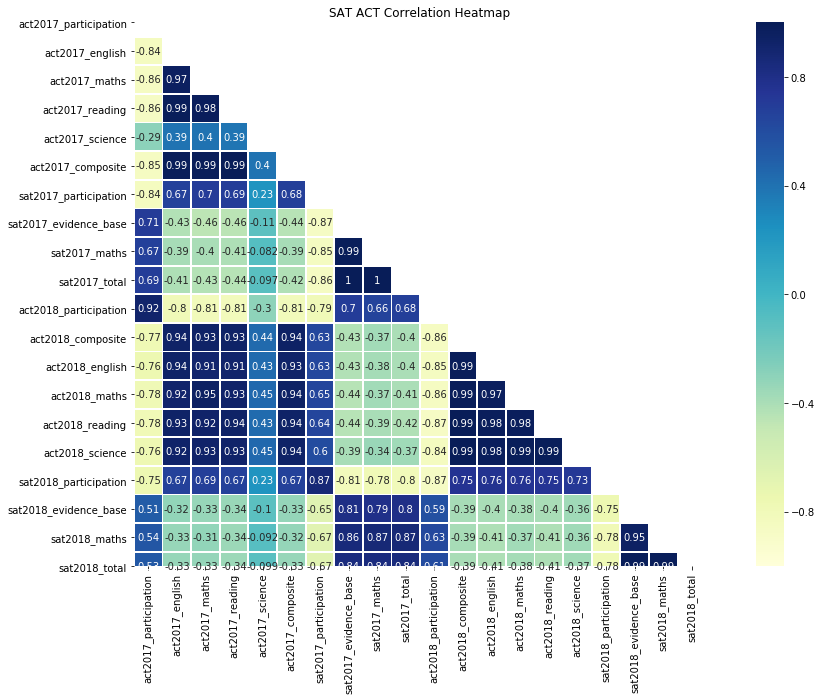

In [77]:
plt.figure(figsize = [18, 10]) # plot figure should always be on top
corr = final_merge.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.title('SAT ACT Correlation Heatmap')
sns.heatmap(final_merge.corr(), annot=True, vmin = -1, vmax = 1, linewidth = 0.8, cmap="YlGnBu", mask = mask, square = True)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [78]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (10, 10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.distplot(dataframe[column], ax = ax[i], bins = 10, fit = norm, kde = True)
        mean = dataframe[column].mean()
        ax[i].set_title(list_of_titles[i], fontsize = 12)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize = 12)
        ax[i].set_ylabel(list_of_ylabels[i], fontsize = 12)
        ax[i].axvline(mean, color = 'r')
        ax[i].grid(axis = 'y', alpha = 0.5) # set grid line, alpha is transparency
 

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

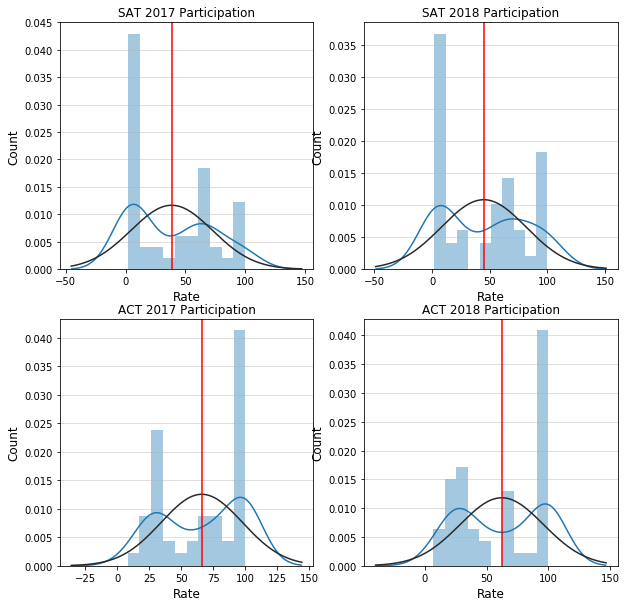

In [79]:
columns = ['sat2017_participation', 'sat2018_participation', 'act2017_participation', 'act2018_participation']
title = ['SAT 2017 Participation', 'SAT 2018 Participation', 'ACT 2017 Participation', 'ACT 2018 Participation']
xlabels = ['Rate', 'Rate', 'Rate', 'Rate']
ylabels = ['Count', 'Count', 'Count', 'Count']

subplot_histograms(final_merge, columns, title, xlabels, ylabels)

Participation rates are not normally distributed, mean is not equals to 𝜇, and the chart do not display a bell curve shape. I am in the opinion that we do not have enough sample size for it to be normally distributed. We only have 2 data points, one for year 2017 and one for year 2018

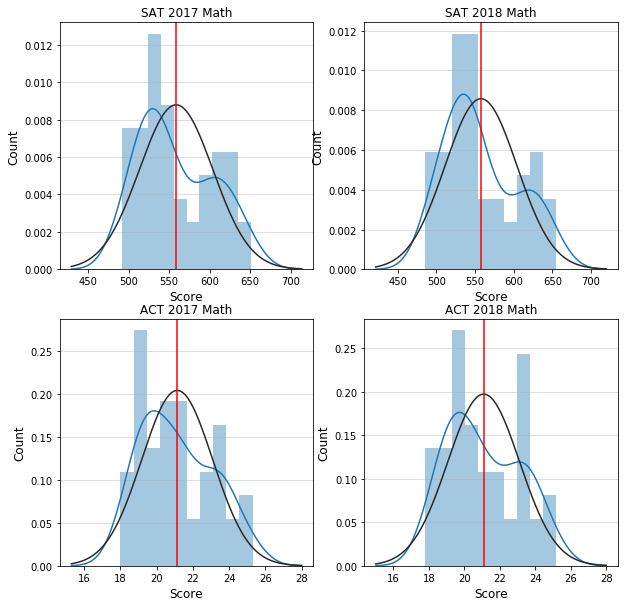

In [80]:
columns = ['sat2017_maths', 'sat2018_maths', 'act2017_maths', 'act2018_maths']
title = ['SAT 2017 Math', 'SAT 2018 Math', 'ACT 2017 Math', 'ACT 2018 Math']
xlabels = ['Score', 'Score', 'Score', 'Score']
ylabels = ['Count', 'Count', 'Count', 'Count']

subplot_histograms(final_merge, columns, title, xlabels, ylabels)

From the chart, the score for maths for both SAT and ACT looks normally distributed. The mean is near the 𝜇, shape of the graph is quite similar to a bell curve, the 68%, 95% and 99.7% rule seems to be observed base on the graph. However I am in the opinion that this is a coincidence. First it is because we only have 2 data points, too little to get a nomally distributed chart. Also, if this is a true normal distribution, then we would have the same observation for the rest of the histogram. WE already observed that Partitions is not a normal distribution.  

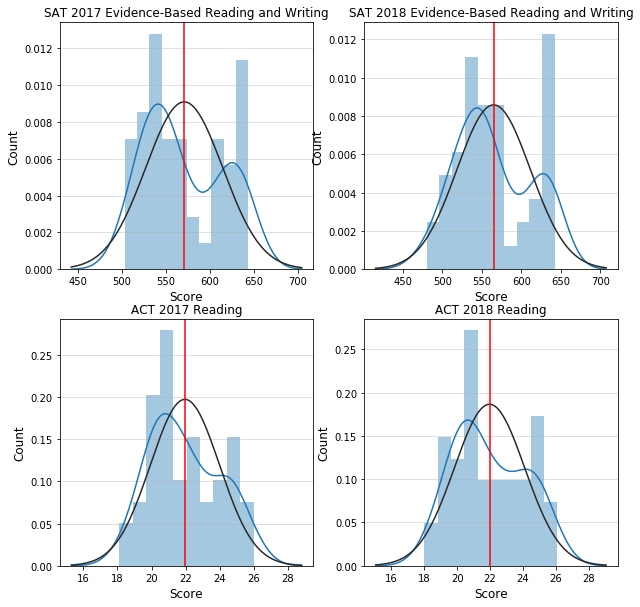

In [81]:
columns = ['sat2017_evidence_base', 'sat2018_evidence_base', 'act2017_reading', 'act2018_reading']
title = ['SAT 2017 Evidence-Based Reading and Writing', 'SAT 2018 Evidence-Based Reading and Writing', 'ACT 2017 Reading', 'ACT 2018 Reading']
xlabels = ['Score', 'Score', 'Score', 'Score']
ylabels = ['Count', 'Count', 'Count', 'Count']

subplot_histograms(final_merge, columns, title, xlabels, ylabels)

Like the Math histogram above, it seems like ACT's Reading Score and SAT's Evidence-Based Reading and Writing score looks normally distributed. However I am in the opinion that this is a coincidence.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [82]:
# A function to plot scatter plots

def subplot_scatter(dataframe, column_x, column_y, list_of_titles):
    nrows = int(np.ceil(len(column_x)/2)) # Makes sure you have enough rows
    #ncols = int(len(column_x))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (15, 28))
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, (columnx, columny) in enumerate(zip(column_x, column_y)): # Gives us an index value to get into all our lists
        sns.regplot(x = columnx, y = columny, data = dataframe, ax = ax[i], color ='b')
        ax[i].set_title(list_of_titles[i], fontsize = 12)
        ax[i].set_xlabel(column_x[i].replace('_', ' ').title(), fontsize = 12)
        ax[i].set_ylabel(column_y[i].replace('_', ' ').title(), fontsize = 12)
        #ax[i].legend(column_x, loc = 'upper right')
        ax[i].grid(axis = 'y', alpha = 0.5) # set grid line, alpha is transparency

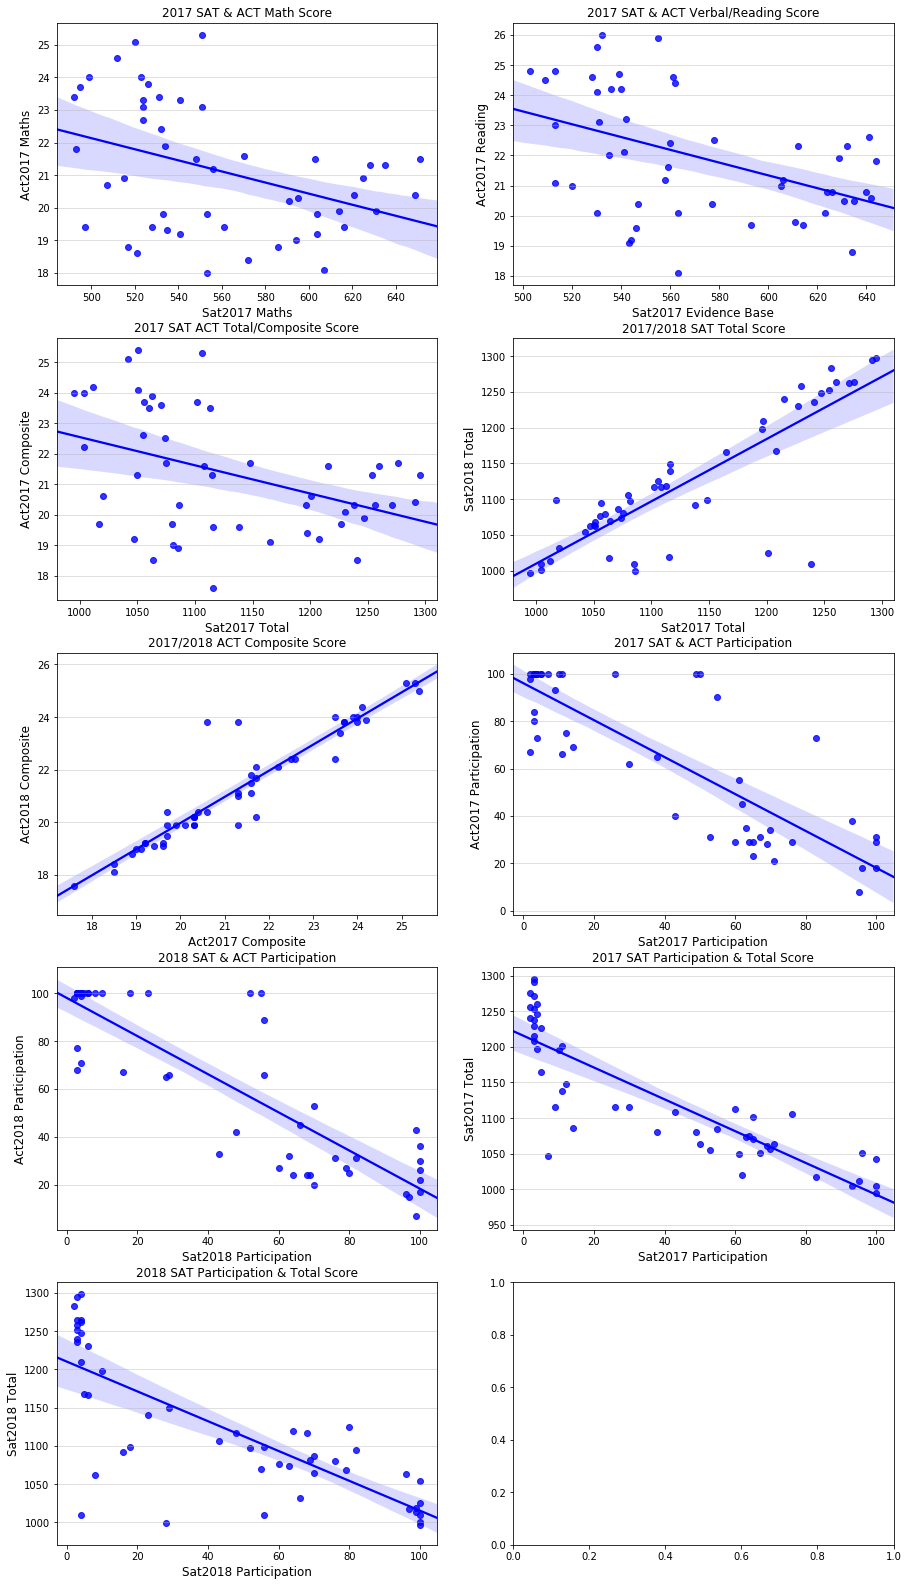

In [83]:
x = ['sat2017_maths', 'sat2017_evidence_base', 'sat2017_total', 'sat2017_total', 'act2017_composite', 'sat2017_participation', 'sat2018_participation', 'sat2017_participation', 'sat2018_participation']
y = ['act2017_maths', 'act2017_reading', 'act2017_composite', 'sat2018_total', 'act2018_composite', 'act2017_participation', 'act2018_participation', 'sat2017_total', 'sat2018_total']
title = ['2017 SAT & ACT Math Score', '2017 SAT & ACT Verbal/Reading Score', '2017 SAT ACT Total/Composite Score', '2017/2018 SAT Total Score', '2017/2018 ACT Composite Score', '2017 SAT & ACT Participation', '2018 SAT & ACT Participation', '2017 SAT Participation & Total Score', '2018 SAT Participation & Total Score']

subplot_scatter(final_merge, x, y, title)

When comparing similar subject or total scores between SAT and ACT, we observe that there is a slight negative correlation.

The participation rate between SAT and ACT for the same year are negatively correlated to quite a high degree.

Individual test's total score when compared between the years are positive correlated to quite a high degree

An interesting find is that the SAT's participation rate and its total score for the same year is negatively correlated. The same is also observed for ACT.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [84]:
def draw_boxplot(dataframe, title):
    plt.figure(figsize = (10, 5))
    plt.title(title)
    sns.boxplot(data = dataframe, orient = 'v', palette = 'Blues')

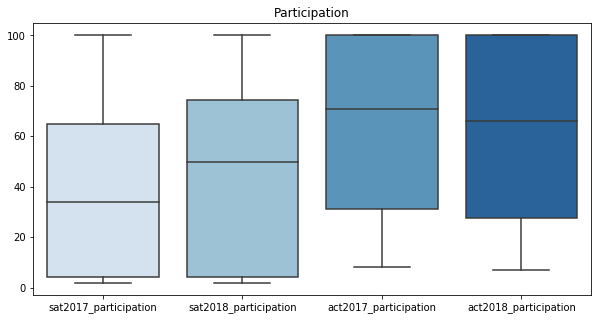

In [85]:
participation_df = final_merge[['sat2017_participation', 'sat2018_participation' , 'act2017_participation' , 'act2018_participation']]

draw_boxplot(participation_df, 'Participation')

It can be seen that the participation rate of ACT is higher than SAT for both years. ACT have a higher mean, 25 percentile and 75 percentile when compared to SAT. There are no From the plot we can see that SAT's participation are skewed more to the right while ACT's participation for both years are skewed more to the left. 

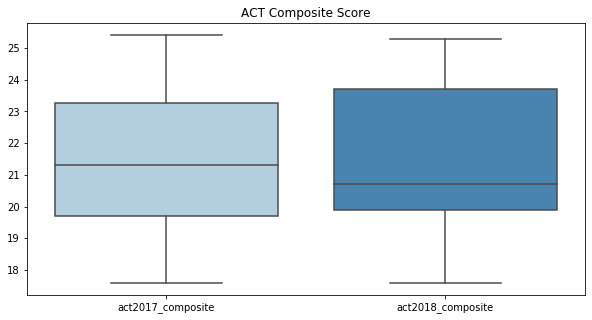

In [86]:
actcomposite_df = final_merge[['act2017_composite', 'act2018_composite']]
draw_boxplot(actcomposite_df, 'ACT Composite Score')

We can see from the box plot for ACT 2017 composite score is more normally distributed. However for ACT 2018, it is slightly skewed to the right. ACT 2018 composite score have a lower median. This could indicate that the test for 2018 was slightly tougher or structured not close to what is taught in school, resulting in varying results.

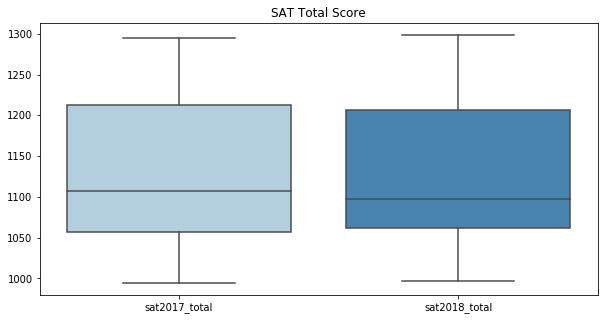

In [87]:
sattotal_df = final_merge[['sat2017_total', 'sat2018_total']]
draw_boxplot(sattotal_df, 'SAT Total Score')

SAT's total score for both years are more similar compared to ACT's composite. They both have a slightly lower mean and their spread is slightly the same. This can indicate that SAT maintains's their test's difficulty resulting in consistent results.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [88]:
increase20['sat_yoy'] = increase20['sat2018_participation'] - increase20['sat2017_participation']
increase20['act_yoy'] = increase20['act2018_participation'] - increase20['act2017_participation']

increase20.head()

,act2017_participation,act2017_english,act2017_maths,act2017_reading,act2017_science,act2017_composite,sat2017_participation,sat2017_evidence_base,sat2017_maths,sat2017_total,...,act2018_english,act2018_maths,act2018_reading,act2018_science,sat2018_participation,sat2018_evidence_base,sat2018_maths,sat2018_total,sat_yoy,act_yoy
state,,,,,,,,,,,,,,,,,,,,,
Colorado,100,20.1,20.3,21.2,20.9,20.6,11,606,595,1201,...,23.9,23.2,24.4,23.5,100,519,506,1025,89,-70
Illinois,93,21.0,21.2,21.6,21.3,21.3,9,559,556,1115,...,24.1,23.4,24.2,23.4,99,513,506,1019,90,-50
Ohio,75,21.2,21.6,22.5,22.0,21.7,12,578,570,1148,...,19.3,20.3,20.8,20.4,18,552,547,1099,6,25
Rhode Island,21,24.0,23.3,24.7,23.4,23.9,71,539,524,1063,...,24.4,23.6,25.0,23.5,97,513,505,1018,26,-6


Created new column for Year on Year comparison for both ACT and SAT

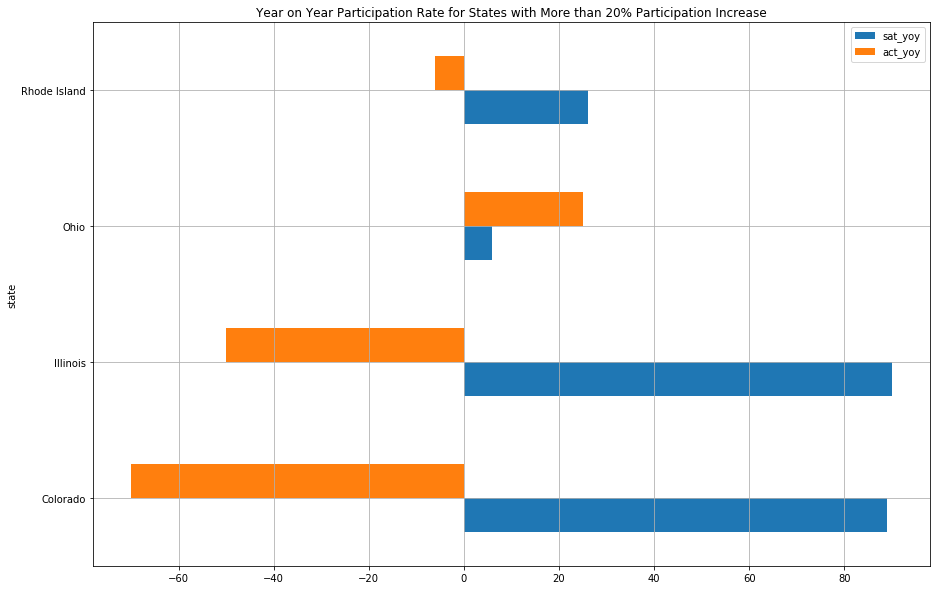

In [89]:
increase20[['sat_yoy', 'act_yoy']].plot(kind = 'barh', title = 'Year on Year Participation Rate for States with More than 20% Participation Increase', figsize = (15, 10), grid = 'on');

The above chart shows year on year growth rate for states with more that 20% increase in SAT or ACT. Only 4 states observed this trend. They are Colorado, Illinois, Ohio and Rhode Island.

From the chart, Colorado, Illinois have a huge year on year difference for SAT and ACT's participation. SAT incresed arounf 90% while ACT decreased around 50% to 70%. 

Ohio shows an interesting trend, increasing for both SAT and ACT, with ACT having a higher growth of above 20%

In Rhode Island, SAT increase slightle more than 20% while ACT declined close to 10%

After some research, it is decided that we should focus our efforts on Ohio to try and increase the participation rate for SAT. Before committing to this, we should take a deeper look into their data to see if we can uncover any information which may change our decisions

In [90]:
# Reset index and create a new data frame with only Ohio in

ohio = increase20.reset_index()
ohio = ohio[ohio.values == 'Ohio']
ohio.set_index('state', inplace = True)

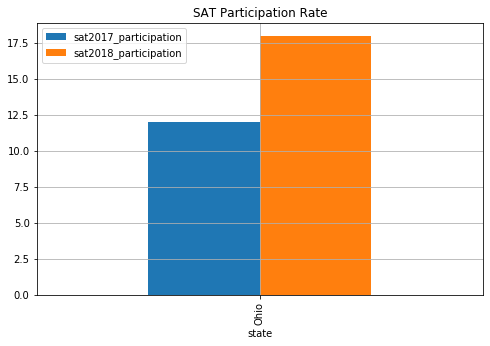

In [91]:

ohio[['sat2017_participation', 'sat2018_participation']].plot(kind = 'bar', title = 'SAT Participation Rate', figsize = (8, 5), grid = 'on');

The chart above compares the participation rate for Ohio for both years. It can be observed that quite an increase based on the scale of the plot. With this, we will need to compare the total score to see if the result declined significantly due to their correlation

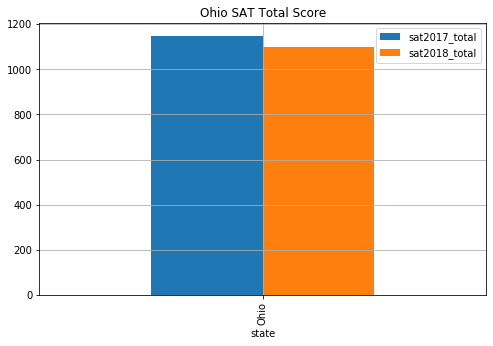

In [92]:
ohio[['sat2017_total', 'sat2018_total']].plot(kind = 'bar', title = 'Ohio SAT Total Score', figsize = (8, 5), grid = 'on');

The chart above shows the total SAT score for both years. We notice that the decline in total scores is not as significant in scale as Ohio's participation.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [93]:
final_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
act2017_participation,50.0,65.920,32.110676,8.0,31.000,71.00,100.000,100.0
act2017_english,50.0,20.862,2.324307,16.3,19.000,20.55,23.100,25.5
act2017_maths,50.0,21.136,1.973990,18.0,19.400,20.90,23.000,25.3
act2017_reading,50.0,21.956,2.046317,18.1,20.425,21.70,23.875,26.0
act2017_science,50.0,20.992,3.195139,2.3,19.900,21.10,22.275,24.9
act2017_composite,50.0,21.344,2.006435,17.6,19.700,21.30,23.275,25.4
sat2017_participation,50.0,38.600,34.560211,2.0,4.000,34.00,65.000,100.0
sat2017_evidence_base,50.0,570.860,44.385146,503.0,535.250,559.50,613.500,644.0
sat2017_maths,50.0,558.660,45.839832,492.0,524.000,549.50,601.000,651.0
sat2017_total,50.0,1129.460,89.983720,995.0,1057.000,1107.00,1213.250,1295.0


Answers:

From the describe function, it looks that the features are normally distributed, the mean is quite close to the 50 percentile and about 68% of the data values falls within one standard deviation of the mean, 95% of the population falls within 2 standard deviation of and 99.7% falls within 3 standard deviation.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

In a normal distribution, the graph of the histogram will resemble a bell curve, its mean will be at center of the curve, approximately 68.2% of all of the points are within the range -1 to 1 standard deviation, 95.5% of all of the points are within the range -2 to 2 standard deviations and 99.7% of all of the points are within the range -3 to 3 standard deviations. 

The central limit theoram states that the distribution will be normal if we have enough samples of the data. However in this case, although it seems that we have a total of 50 samples we actually only have 2 data points, one for year 2017 and one for year 2018. 

We are not able to take each state as a sample as this is not an apple to apple comparison. there are different external factors like population size, regulation, or demorgraphic conditions which may affect the data for each states differently.  

We may get a normally distributed sample if we were to collect data for more years, and compare the data based on individual state or national averages.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

Although it seems from the graph plotted above that maths is normally distributed, however it is opined to be of a coincidence as the other features do not display this characteristics. For Reading and Rates, it is displayed through earlier plotted histogram that they are not normally distributed.

We only have 2 data points, the amount of sample we have to be able to get a normal distribution and make statistical inference from the data is inadequate. Having more data over the years and using it for each state will be a more sound decision.

Estimation is to generate an outcome that is precise enough to be useful to infer that it will be similar to the population. In a normal distribution, we can explain the entire distribution using the mean and standard deviation. A normal distribution allows us to easily estimate how volatile a variable is and given a confidence level, what its likely value is going to be, making it simple to forecast a variable and find the probability of it within a range of values. Without the characteristics of a normal distribution, we will not be to be confident with our estimates and am unable to accurate determine the margin error. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

In [94]:
participation = final_merge[['act2017_participation', 'sat2017_participation']]
participation = participation.melt()

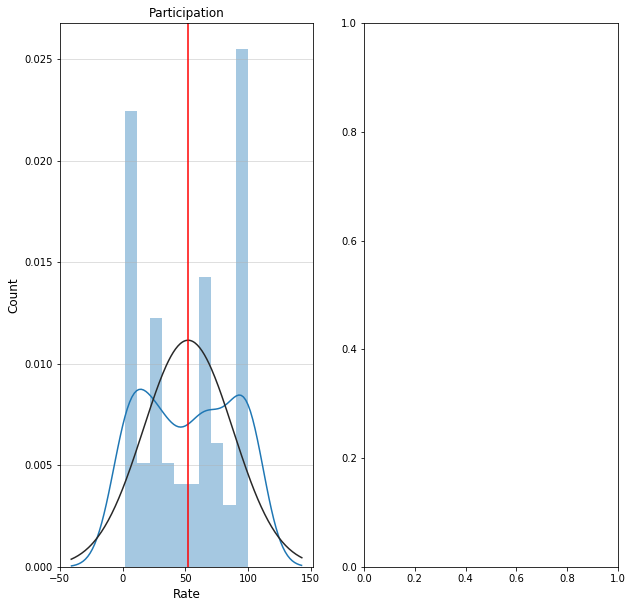

In [95]:
column = ['value']
title = ['Participation']
xlabel = ['Rate']
ylabel = ['Count']

subplot_histograms(participation, column, title, xlabel, ylabel)

Answer:

From the above, melt was performed on a dataframe containing SAT and ACT 2017 participation rate. From the histogram plotted, we can see that it does not follow a normal distribution. As we only have 2 data points, one for year 2017 and 2018, we do not have enough sample size. It is not ideal to treat each state as a sample as state's population and demorgraphic are different, they have different external factors which may affect the participation rate. 

A better way will be to collect data from one state over more years. This way, base on the central limit theoram, we will be able to get a normal distribution for us to draw statistical inference from. 

In this case, it does not make sense to draw statistical inference from 2017's participation rate from ACT and SAT

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

In [96]:
maths = final_merge[['act2017_maths', 'sat2017_maths', 'act2018_maths', 'sat2018_maths']]
maths = maths.melt()

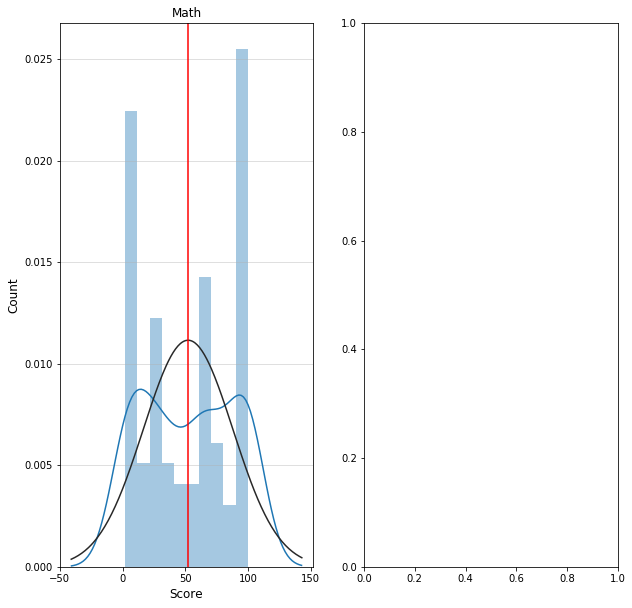

In [97]:
column = ['value']
title = ['Math']
xlabel = ['Score']
ylabel = ['Count']

subplot_histograms(participation, column, title, xlabel, ylabel)

Answer: 

Similar to the example for participation,  The graph also shows that it is not normally distributed. Adding to the fact, the way ACT and SAT scale their maths score is different. It is does not make sense to conduct statistical inference from the math score.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [98]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Colorado, Illinois and Rhode Island has more than 20% year on year growth rate for SAT. Below are the information gathered on the possible causes for the increase.

Colorado
Since 2001, Colorado juniors has been required to take the ACT In 2015, the state Department of Education chose The College Board SAT has a reputation of being more reason-based and focused on critical thinking compared to ACT being more fact-recall test.
Source: https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/


Illinois
For the past 15 years, Illinois has been giving students the ACT The College Board won a bid with the State High school juniors will not be charged for taking the SAT Free college entrance exam has been popular
Source: https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html#targetText=Illinois%20moves%20ahead%20with%20new%20testing%20plan%2C%20replacing%20ACT%20with%20SAT&targetText=It's%20official%2C%20according%20to%20the,into%20Illinois%20public%20high%20schools.


Rhode Island
All the flagship universities in the state have held on to the SAT as a prerequisite for admission, Rhode Island is also one of the 10 states that give the SAT to students for free 6 Schools in the Rhode Island have made submitting ACT or SAT scores optional for college admission
Source: https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores
Source: https://www.providencejournal.com/news/20180625/sat-requirement-waning-in-ri-and-nationally--poll


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

It is recommended that we focus we do not try to influence too many states at the same time, or increase the participation rate drastically as it will affect the national average total score.

We can work with the the state's Department of Education to mandate the state to participate in SAT.

Ohio is already paying for students taking the SAT or ACT. We can work with the state Department of Education to make SAT mandatory, Ohio has a healthy 2018 participation rate and increasing their their participation rate will have manageable impact on the total scores.